In [1]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense

In /home/amarnath/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/amarnath/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/amarnath/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/amarnath/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/amarnath/.local/lib/python3.6/site-packages/matplotlib/

In [2]:

class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

In [3]:

data_train = pd.read_csv('data_train.csv', encoding='utf-8')
data_test = pd.read_csv('data_test.csv', encoding='utf-8')

X_train = data_train.Text
X_test = data_test.Text

y_train = data_train.Emotion
y_test = data_test.Emotion

data = data_train.append(data_test, ignore_index=True)

In [4]:
data

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
...,...,...
11322,sadness,"My sweetheart left me, or rather we decided to..."
11323,sadness,"Well , it's too bad that we like different kin..."
11324,neutral,It sure is .
11325,sadness,He ’ s got laid off again . I do feel sorry fo...


In [5]:
print(data.Emotion.value_counts())


joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


In [6]:
bins=[0,50,75, np.inf]
num_words = data.Text.apply(lambda x : len(x.split()))

data['bins']=pd.cut(num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

print(word_distribution)

      bins  counts
0    0-100   11318
1  100-300       9
2  300-500       0
3  500-800       0
4     >800       0


In [7]:
def clean_text(data):
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    data = word_tokenize(data)
    return data

In [8]:
texts = [' '.join(clean_text(text)) for text in data.Text]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]


In [9]:
print(len(texts), len(texts_train), len(texts_test))

# texts_train

11327 7934 3393


In [10]:
print(texts_train[0])


There are tons of other paintings that I think are better .


In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 12087


In [12]:
MAX_LENGTH = 100
print(sequence_train[0])

[57, 51, 5933, 8, 132, 3296, 11, 1, 119, 51, 345]


In [13]:
X_train_pad = pad_sequences(sequence_train, maxlen = MAX_LENGTH )
X_test_pad = pad_sequences(sequence_test, maxlen = MAX_LENGTH )

In [14]:
X_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   57,   51, 5933,    8,  132, 3296,   11,    1,  119,   51,
        345], dtype=int32)

In [15]:
encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in data_train.Emotion]
y_test = [encoding[x] for x in data_test.Emotion]

In [16]:
print(texts_train[0])
print(sequence_train[0])
print(y_train[0])

There are tons of other paintings that I think are better .
[57, 51, 5933, 8, 132, 3296, 11, 1, 119, 51, 345]
4


In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 1.], dtype=float32)

In [18]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
from keras.models import Model
from keras.callbacks import ModelCheckpoint

# from keras.layers import 


In [19]:
num_class = len(class_names)

In [51]:



inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)


model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# history = model.fit([X_train_pad], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
#           shuffle=True, epochs=5, callbacks=[checkpointer])
batch_size = 128
epochs = 50

hist = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs,
                 validation_data=(X_test_pad,y_test), callbacks=[checkpointer])

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 100)               0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 100, 128)          1547264   
_________________________________________________________________
flatten_10 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                409632    
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 165       
Total params: 1,957,061
Trainable params: 1,957,061
Non-trainable params: 0
_________________________________________________________________
Train on 7934 samples, validate on 3393 samples
Epoch 1/50
7934/7934 [==============================] - 2s 280us/st


Epoch 00037: val_acc did not improve from 0.64928
Epoch 38/50
7934/7934 [==============================] - 2s 232us/step - loss: 0.0196 - acc: 0.9941 - val_loss: 1.7178 - val_acc: 0.6360

Epoch 00038: val_acc did not improve from 0.64928
Epoch 39/50
7934/7934 [==============================] - 2s 229us/step - loss: 0.0209 - acc: 0.9934 - val_loss: 1.7831 - val_acc: 0.6272

Epoch 00039: val_acc did not improve from 0.64928
Epoch 40/50
7934/7934 [==============================] - 2s 234us/step - loss: 0.0212 - acc: 0.9934 - val_loss: 1.6950 - val_acc: 0.6289

Epoch 00040: val_acc did not improve from 0.64928
Epoch 41/50
7934/7934 [==============================] - 2s 223us/step - loss: 0.0187 - acc: 0.9943 - val_loss: 1.7390 - val_acc: 0.6310

Epoch 00041: val_acc did not improve from 0.64928
Epoch 42/50
7934/7934 [==============================] - 2s 230us/step - loss: 0.0190 - acc: 0.9934 - val_loss: 1.7424 - val_acc: 0.6275

Epoch 00042: val_acc did not improve from 0.64928
Epoch 43/

In [20]:
gru_output_size = 128
bidirectional = True
embed_num_dims = 300
embedding_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = MAX_LENGTH,
                         
                         trainable=False)
# Embedding Layer, LSTM or biLSTM, Dense, softmax
# embedding_layer = Embedding(vocab_size,
#                             128,
#                             input_length=MAX_LENGTH)(inputs)

model = Sequential()
model.add(embedding_layer)

if bidirectional:
    model.add(Bidirectional(GRU(units=gru_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(GRU(units=gru_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(num_class, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
# filepath="weights-simple.hdf5"
checkpoint_path = "amar_cp.ckpt"

# Create a callback that saves the model's weights
checkpointer = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# history = model.fit([X_train_pad], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
#           shuffle=True, epochs=5, callbacks=[checkpointer])
batch_size = 128
epochs = 3

hist = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs,
                 validation_data=(X_test_pad,y_test), callbacks=[checkpointer])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          3626400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               329472    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 3,957,157
Trainable params: 330,757
Non-trainable params: 3,626,400
_________________________________________________________________

Train on 7934 samples, validate on 3393 samples
Epoch 1/3
7934/7934 [==============================] - 37s 5ms/step - loss: 9.4742 - acc: 0.3204 - val_loss: 1.5382 - val_acc: 0.3442

Epoch 00001: saving model to amar_cp.ckpt
Epoch 2/3
7934/7934 [==============================] - 41s 5ms/step - loss: 1.4625 - acc: 0.3418 - val_loss: 1.5024 - val_acc: 0.3386

Epoch 0

In [23]:
model.save('amarnath_lstm.h5') #sAVING THE MODEL
# model.save_weights("amar_cp_final.ckpt")


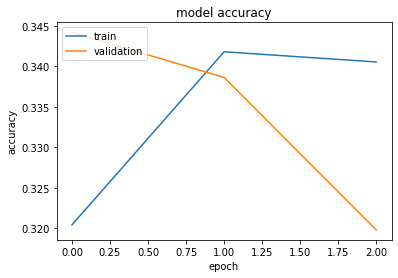

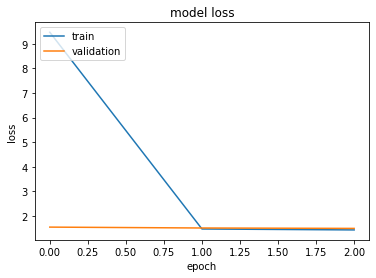

In [24]:
#  "Accuracy"
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
# num_classes = 5
# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3,
#                  activation='relu',
#                  input_shape=(500,300)))
# model.add(Conv1D(128, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Conv1D(128, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Conv1D(128, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Conv1D(128, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))

# model.add(Dense(num_classes, activation='softmax'))

In [26]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [27]:
print("Accuracy: {:.2f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emotion, predictions, average='micro') * 100))

Accuracy: 31.98%

F1 Score: 31.98


In [28]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


F1 Score: 31.98


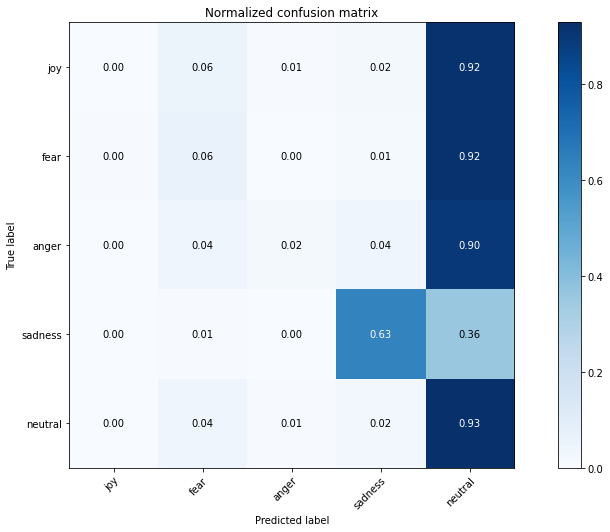

In [29]:
print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emotion, predictions, average='micro') * 100))

# Plot normalized confusion matrix
plot_confusion_matrix(data_test.Emotion, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [30]:
print('Message: {}\nPredicted: {}'.format(X_test[4], predictions[4]))


Message: My boyfriend didn't turn up after promising that he was coming.
Predicted: sadness


In [32]:
import time

message = ['delivery was hour late and my pizza was cold!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=MAX_LENGTH)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['delivery was hour late and my pizza was cold!']
predicted: sadness (0.03 seconds)


In [46]:
# from keras.models import 
from tensorflow.keras.models import load_model
# model.load_weights('amar_cp_final.ckpt', compile=False)
predictor = load_model('/opt/amarnath/aicopia/sentiment/weights-simple.hdf5')


message_list = [['delivery was hour late and my pizza was cold!'],
                ['They seemed anxious and hesitant about leaving , as if uncertain of which direction to take .'],
                ['Leading scorer Paul Wilkinson struck his 20th goal of the season against his former club but looked glum as he left the dressing room . ']]

for message in message_list:
    seq = tokenizer.texts_to_sequences(message)
    padded = pad_sequences(seq, maxlen=MAX_LENGTH)

    start_time = time.time()
    pred = predictor.predict(padded)

    print('Message: ' + str(message[0]))
    print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: delivery was hour late and my pizza was cold!
predicted: joy (1.33 seconds)
Message: They seemed anxious and hesitant about leaving , as if uncertain of which direction to take .
predicted: joy (0.01 seconds)
Message: Leading scorer Paul Wilkinson struck his 20th goal of the season against his former club but looked glum as he left the dressing room . 
predicted: joy (0.01 seconds)
